# Basis Change

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook I will explain the concept of a basis and show how a single vector can be described with respect to two different bases. 


A basis of a vector space $V$ is defined as a set of vectors $B = ( \underline{b_{1}}, \underline{b_{2}}, \underline{b_{3}}$ ) (with $V \in {\rm I\!R}^{3}$) with which a linear combination of $B$ may describe any vector existing within $V$

The most used basis is the standard, $B_{s.b} = ( \underline{b_{1}}, \underline{b_{2}}, \underline{b_{3}})$ ) with

$$ \underline{b_{1}} = \begin{pmatrix} 1\\
0 \\ 0  \end{pmatrix} , \space  \space \space \space \space \space
\underline{b_{2}} = \begin{pmatrix} 0\\
1 \\ 0 \end{pmatrix} , \space  \space \space \space \space \space
\underline{b_{3}} = \begin{pmatrix} 0\\
0 \\ 1  \end{pmatrix} $$

Trivially any vector existing within $V$ is easily described by a linear combination of these vectors.

However, we are not constrained to desribing vectors with a single basis. We may wish to describe vectors in 
$V$ using a new basis $\tilde{B} = ( \underline{\tilde{b_{1}}}, \underline{\tilde{b_{2}}}, \underline{\tilde{b_{3}}})$ 

where

$$ \underline{\tilde{b_{1}}} = \begin{pmatrix} 1\\
0 \\ -1  \end{pmatrix} , \space  \space \space \space \space \space
\underline{\tilde{b_{2}}} = \begin{pmatrix} 0\\
-1 \\ 1 \end{pmatrix} , \space  \space \space \space \space \space
\underline{\tilde{b_{3}}} = \begin{pmatrix} -1\\
0 \\ 0  \end{pmatrix} $$


We can plot these basis according to the view of the standard basis

In [42]:
b_1, b_2, b_3 = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])

In [43]:
b_1t, b_2t, b_3t = np.array([1, 0, -1]), np.array([0, -1, 1]), np.array([-1, 0, 0])

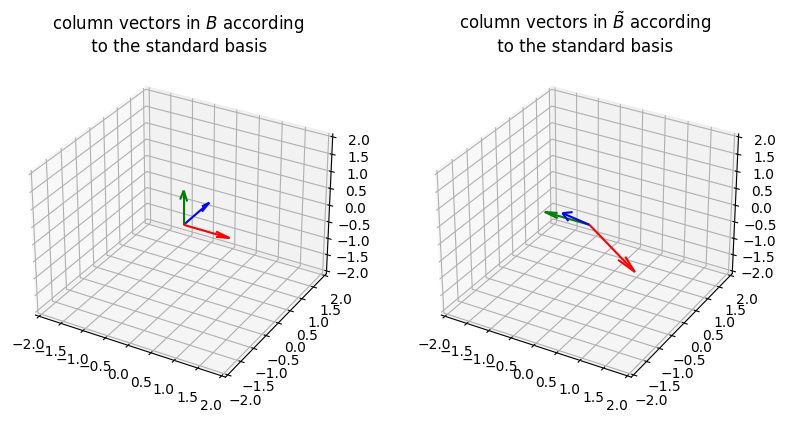

In [64]:
fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *b_1, color="r")
ax.quiver(0, 0, 0, *b_2, color="b")
ax.quiver(0, 0, 0, *b_3, color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("column vectors in $B$ according \n to the standard basis ")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *b_1t, color="r")
ax.quiver(0, 0, 0, *b_2t, color="b")
ax.quiver(0, 0, 0, *b_3t, color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r"column vectors in $\tilde{B}$ according" + "\n to the standard basis ")


plt.show()

It is important to be clear that this view of the basis vectors wholly depends from which basis you are considering it from. Let's take a look at the view of the basis vectors according to the ~ basis

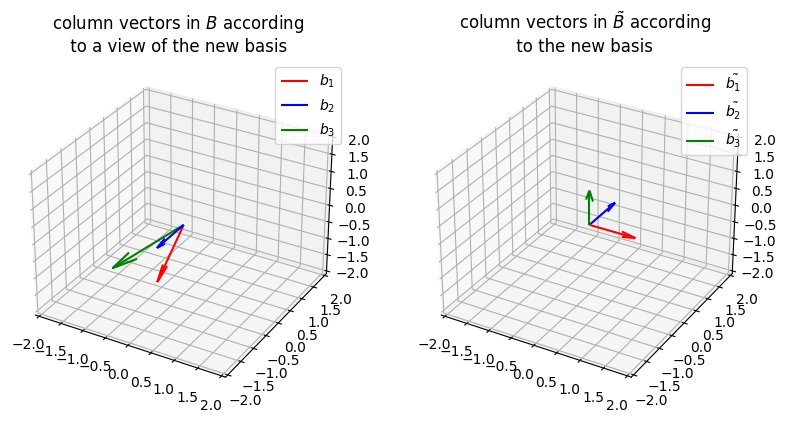

In [61]:
S = np.array([b_1t, b_2t, b_3t])
S_inv = np.linalg.inv(S)


fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 2

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *(S_inv @ b_1), color="r", label=r"$b_{1}$")
ax.quiver(0, 0, 0, *(S_inv @ b_2), color="b", label=r"$b_{2}$")
ax.quiver(0, 0, 0, *(S_inv @ b_3), color="g", label=r"$b_{3}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("column vectors in $B$ according \n to the new basis ")
ax.legend()

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *[1, 0, 0], color="r", label=r"$\tilde{b_{1}}$")
ax.quiver(0, 0, 0, *[0, 1, 0], color="b", label=r"$\tilde{b_{2}}$")
ax.quiver(0, 0, 0, *[0, 0, 1], color="g", label=r"$\tilde{b_{3}}$")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r"column vectors in $\tilde{B}$ according" + "\n to the new basis ")
ax.legend()


plt.show()

This result may look quite consfusing. To help understand how we get to it we need to understand how to translate between bases.

Let's take vector $x$ where
$$x = \begin{pmatrix} -3\\
2 \\ -2 \end{pmatrix}$$

More specifically this vector is described as 
$$ x = -3 \hat{x_{1}}  + 2 \hat{x_{2}} - 2 \hat{x_{3}}$$

where we have delibrately left the vectors $\{\hat{x_{1}}, \hat{x_{2}}, \hat{x_{3}} \}$ unspecified. The actual direction of vector $x$ depends entirely upon the basis vectors used to describe $\{\hat{x_{1}}, \hat{x_{2}}, \hat{x_{3}} \}$

Let's go ahead and plot this vector $x$

In [65]:
x = np.array([-3, 2, -2])

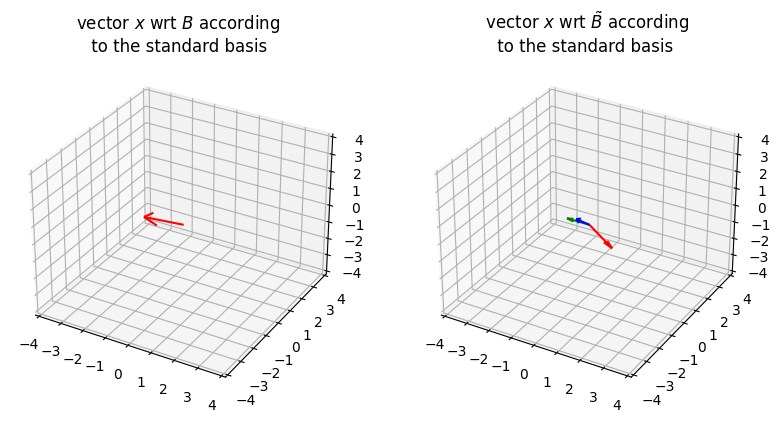

In [67]:
fig = plt.figure(figsize=plt.figaspect(0.5))
lims = 4

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.quiver(0, 0, 0, *x, color="r")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title("vector $x$ wrt $B$ according \n to the standard basis ")

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.quiver(0, 0, 0, *b_1t, color="r")
ax.quiver(0, 0, 0, *b_2t, color="b")
ax.quiver(0, 0, 0, *b_3t, color="g")
ax.set_xlim(-lims, lims)
ax.set_ylim(-lims, lims)
ax.set_zlim(-lims, lims)
ax.set_title(r" vector $x$ wrt $\tilde{B}$ according" + "\n to the standard basis ")


plt.show()

When referring to column vectors in column vector notation e.g.
$$ X = \begin{pmatrix} x_{1}\\
x_{2} \end{pmatrix} $$

There is an implicit assumption that we know the unit vectors $\hat{x_{1}}$ and $\hat{x_{2}}$. In fact these are vital bits of information if we are hoping to understand the vector $X$.

Let's take an example to see how changing the basis vectors can affect the vector we wish to describe.

Suppose we have vector $$ X = \begin{pmatrix} -1\\
3 \end{pmatrix} $$

Usually, this would be assumed to be relative to the standard bases i.e.
$$\hat{x_{1}} = \begin{pmatrix} 1\\
0 \end{pmatrix} $$ and
$$\hat{x_{2}} = \begin{pmatrix} 0\\
1 \end{pmatrix} $$ 

Let's call this vector $X_{s.b}$ (s.b for standard basis)

However, no suppose we took some other basis
$$\hat{x_{1}} = \begin{pmatrix} 1\\
1 \end{pmatrix} , \space  \space \space \space \space \space
\hat{x_{2}} = \begin{pmatrix} 1\\
-1 \end{pmatrix} $$ 

We will call this vector $X_{n.b}$ (n.b for new basis)

Remembering our original vector $ X = \begin{pmatrix} -1\\3 \end{pmatrix} $, let's go ahead and plot $X_{n.b}$ and $X_{s.b}$

In [5]:
X = np.array([-1, 3])

# First we'll calculate the basis vectors for standard basis (sb) and new basis (nb)

x1_hat_sb, x2_hat_sb = np.array([1, 0]), np.array([0, 1])
x1_hat_nb, x2_hat_nb = np.array([1, 1]), np.array([0, 1])

In [6]:
# Now we can stack these basis vectors into a matrix such that the columns of our matrix are the basis vectors.
# We'll call these matrices SB and NB

SB = np.stack([x1_hat_sb, x2_hat_sb])
NB = np.stack([x1_hat_nb, x2_hat_nb])

In [7]:
# Now we are able to multiply our original vector X by our basis matrices

X_sb = SB @ X
X_nb = NB @ X

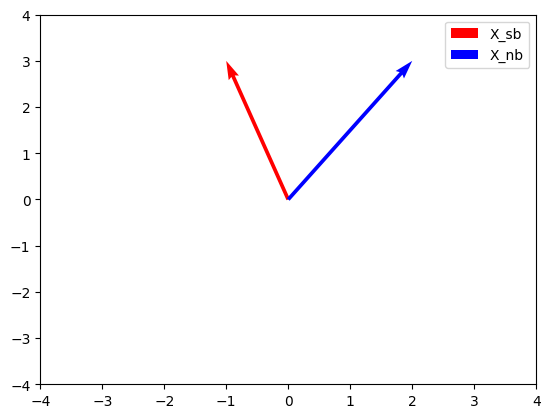

In [8]:
fig, ax = plt.subplots()
ax.quiver(0, 0, *X_sb, angles="xy", scale_units="xy", scale=1, color="r", label="X_sb")
ax.quiver(0, 0, *X_nb, angles="xy", scale_units="xy", scale=1, color="b", label="X_nb")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend()
plt.show()

And as we can see, changing the basis vectors which contextualise the vector X fundamentally changes the vector which we are referring to.